In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:\\Term 5\\Data Mining\\project\\healthcare-dataset-stroke-data.csv")

In [4]:
df.head() 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.shape

(5110, 12)

our dataset contain 12  columns and 5110 rows

# features types
## numeric 
age 

avg_glucose_level

bmi
## boolean and categorical

gender 

hypertension

heart_disease

ever_married

work_type

Residence_typr

smoking_status 

stroke

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Missing values

Only bmi contain missing vales 201 rows

In [7]:
df.describe() # no indicateion for outliers but need more analysis as mean approxamienly equal median

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}: {df[column].nunique()} unique values")  # x1 seems irrelevant

gender: 3 unique values
ever_married: 2 unique values
work_type: 5 unique values
Residence_type: 2 unique values
smoking_status: 4 unique values


In [9]:
df.duplicated().sum()

0

## Target variable analysis

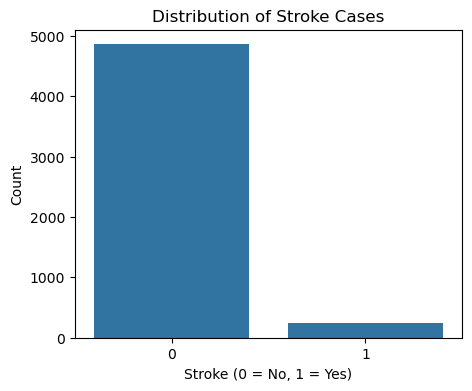

In [10]:
plt.figure(figsize=(5,4))
sns.countplot(x="stroke", data=df)
plt.title("Distribution of Stroke Cases")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show() 
#most cases doesnt have stroke

In [11]:
df['stroke'].value_counts()
#imbalance ??

stroke
0    4861
1     249
Name: count, dtype: int64

## Univariate analysis

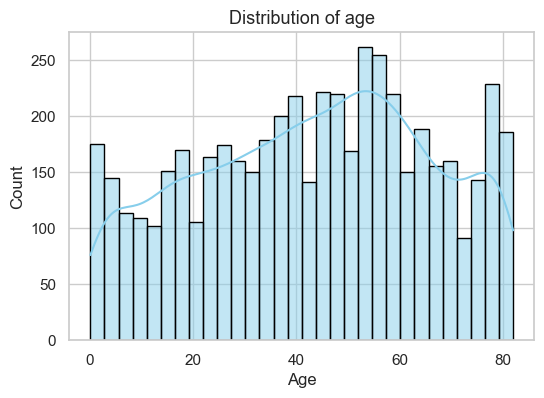

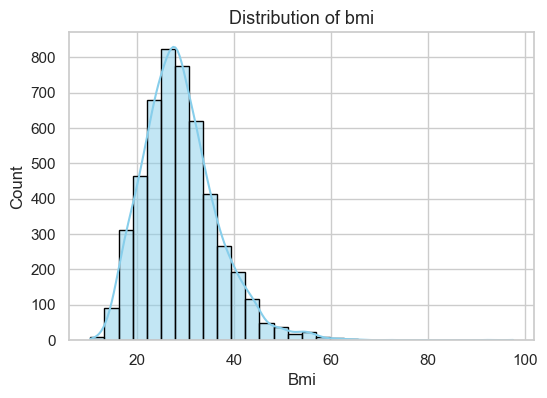

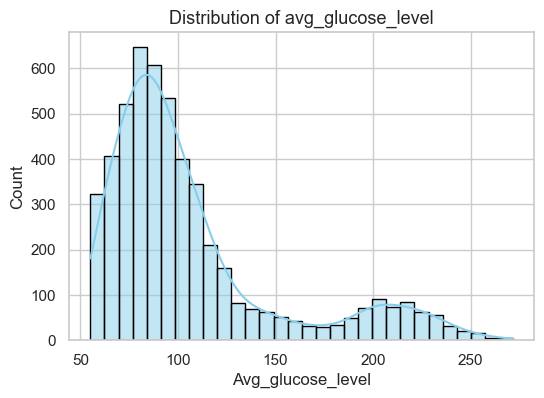

In [12]:
num_features = ['age', 'bmi', 'avg_glucose_level']

# Set visual style
sns.set(style="whitegrid")

for col in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=13)
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.show()

In [13]:
cat_features = [
    'gender',
    'hypertension',
    'heart_disease',
    'ever_married',
    'work_type',
    'Residence_type',
    'smoking_status',
    'stroke'  # include target for quick overview
]


In [14]:
for col in cat_features:
    print(f"\n===== {col.upper()} =====")
    counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': counts, 'Percentage': percentages.round(2)})
    print(summary)



===== GENDER =====
        Count  Percentage
gender                   
Female   2994       58.59
Male     2115       41.39
Other       1        0.02

===== HYPERTENSION =====
              Count  Percentage
hypertension                   
0              4612       90.25
1               498        9.75

===== HEART_DISEASE =====
               Count  Percentage
heart_disease                   
0               4834        94.6
1                276         5.4

===== EVER_MARRIED =====
              Count  Percentage
ever_married                   
Yes            3353       65.62
No             1757       34.38

===== WORK_TYPE =====
               Count  Percentage
work_type                       
Private         2925       57.24
Self-employed    819       16.03
children         687       13.44
Govt_job         657       12.86
Never_worked      22        0.43

===== RESIDENCE_TYPE =====
                Count  Percentage
Residence_type                   
Urban            2596        50.8

C:\Users\SEIF\AppData\Local\Temp\ipykernel_26328\283340208.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', edgecolor='black', hue=None, legend=False)


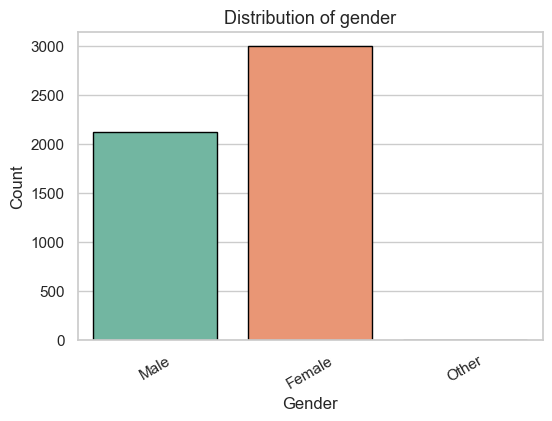

C:\Users\SEIF\AppData\Local\Temp\ipykernel_26328\283340208.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', edgecolor='black', hue=None, legend=False)


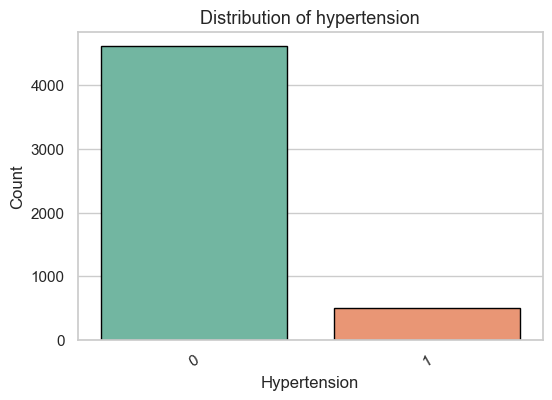

C:\Users\SEIF\AppData\Local\Temp\ipykernel_26328\283340208.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', edgecolor='black', hue=None, legend=False)


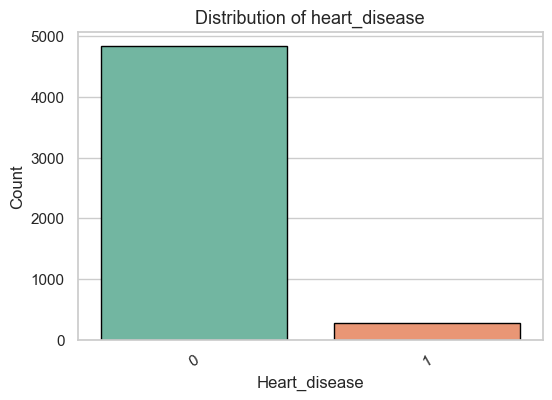

In [15]:
cat_features_1 = ['gender', 'hypertension', 'heart_disease']

for col in cat_features_1:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette='Set2', edgecolor='black', hue=None, legend=False)
    plt.title(f'Distribution of {col}', fontsize=13)
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.show()

C:\Users\SEIF\AppData\Local\Temp\ipykernel_26328\81552887.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', edgecolor='black', hue=None, legend=False)


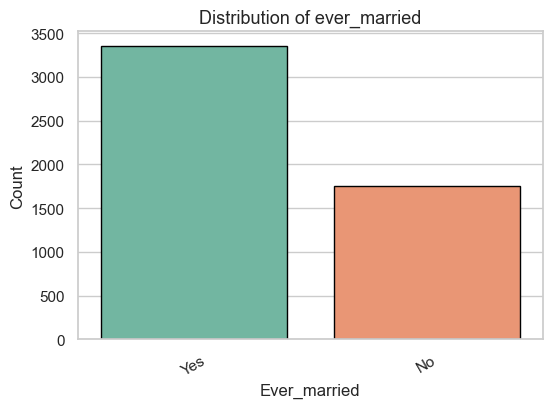

C:\Users\SEIF\AppData\Local\Temp\ipykernel_26328\81552887.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', edgecolor='black', hue=None, legend=False)


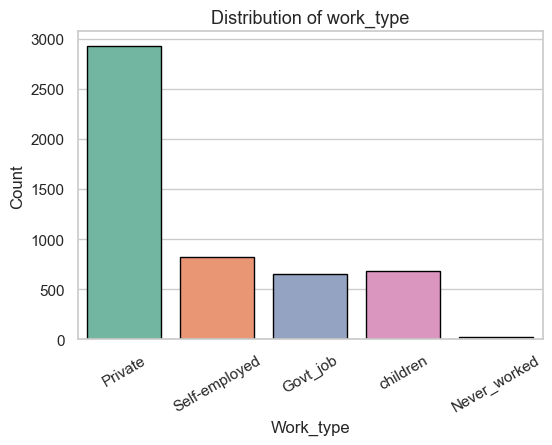

In [16]:
cat_features_2 = ['ever_married', 'work_type']

for col in cat_features_2:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette='Set2', edgecolor='black', hue=None, legend=False)
    plt.title(f'Distribution of {col}', fontsize=13)
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.show()


C:\Users\SEIF\AppData\Local\Temp\ipykernel_26328\2561948803.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', edgecolor='black', hue=None, legend=False)


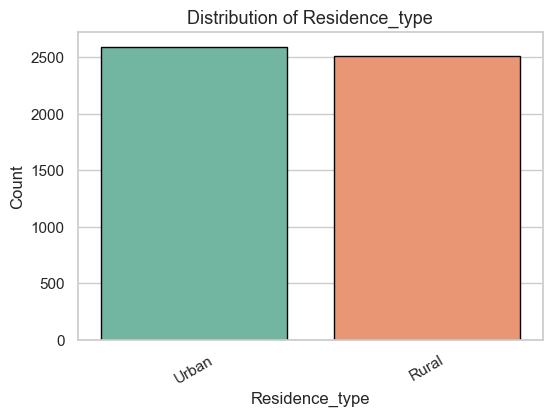

C:\Users\SEIF\AppData\Local\Temp\ipykernel_26328\2561948803.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', edgecolor='black', hue=None, legend=False)


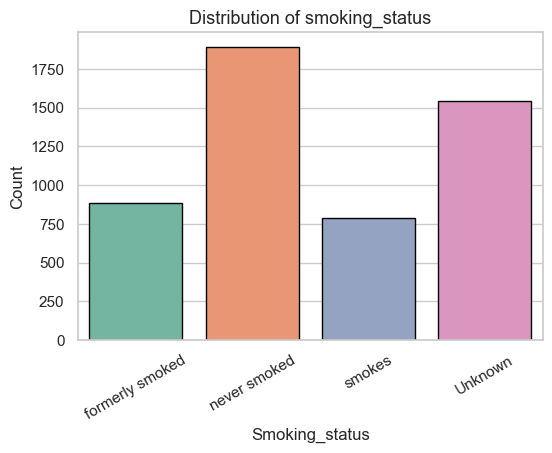

C:\Users\SEIF\AppData\Local\Temp\ipykernel_26328\2561948803.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', edgecolor='black', hue=None, legend=False)


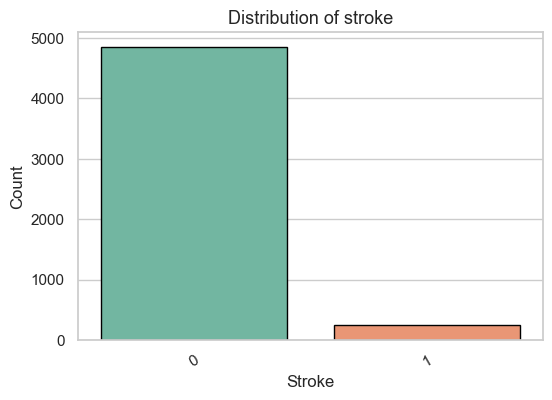

In [17]:
cat_features_3 = ['Residence_type', 'smoking_status', 'stroke']

for col in cat_features_3:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette='Set2', edgecolor='black', hue=None, legend=False)
    plt.title(f'Distribution of {col}', fontsize=13)
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.show()


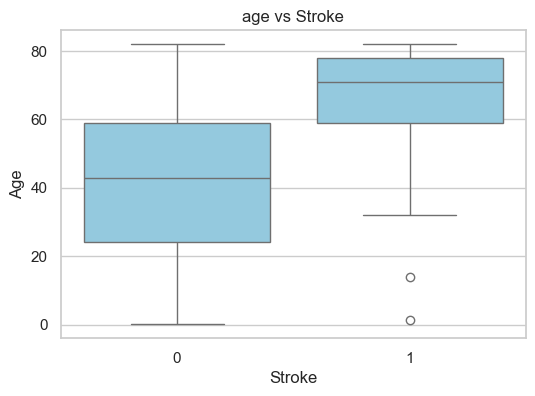

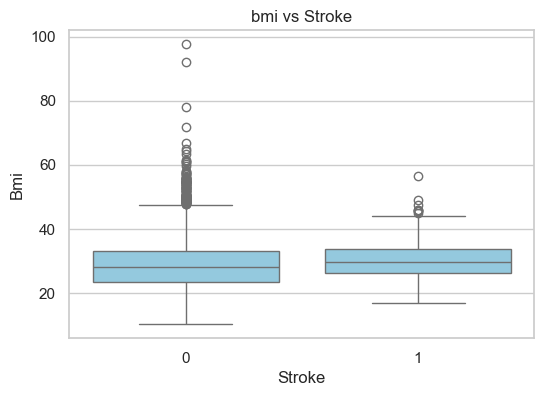

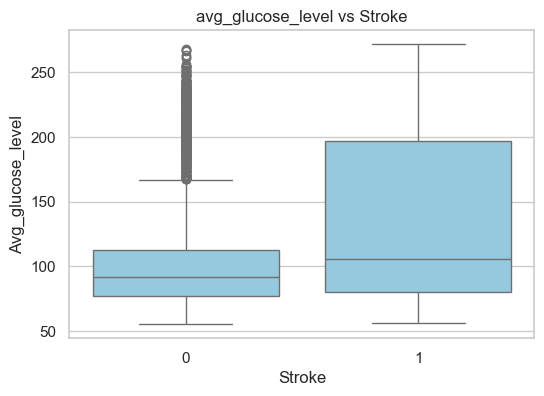

              age        bmi  avg_glucose_level
stroke                                         
0       41.971545  28.823064         104.795513
1       67.728193  30.471292         132.544739


In [18]:
num_features = ['age', 'bmi', 'avg_glucose_level']

for col in num_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='stroke', y=col, data=df, color='skyblue')  # Use color instead of palette
    plt.title(f'{col} vs Stroke')
    plt.xlabel('Stroke')
    plt.ylabel(col.capitalize())
    plt.show()

# Mean comparison table
print(df.groupby('stroke')[num_features].mean())


## INSIGHTS
old people have significantly higher risk of stroke

bmi doesnt seem to have large effect on stroke

people who have have higher glucose level tends to also have a stroke but need more analysis


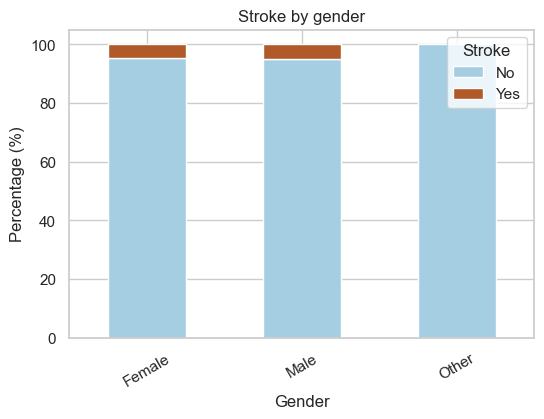

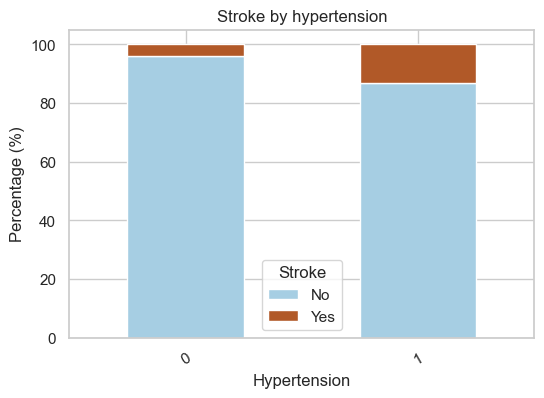

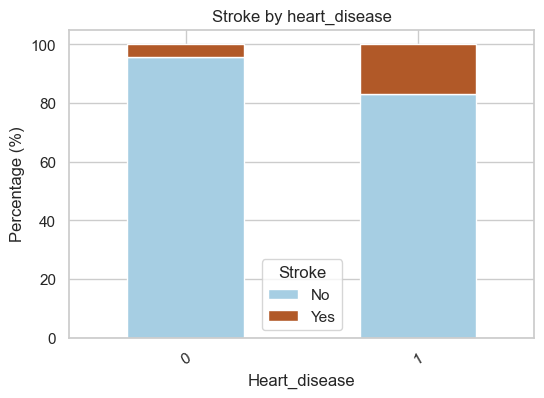

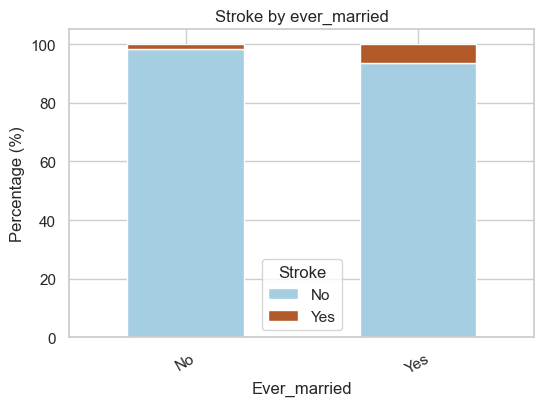

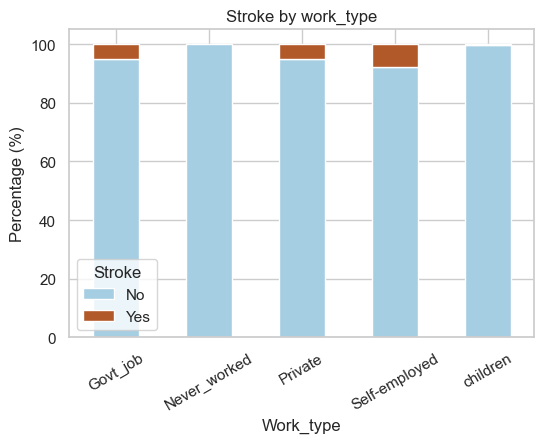

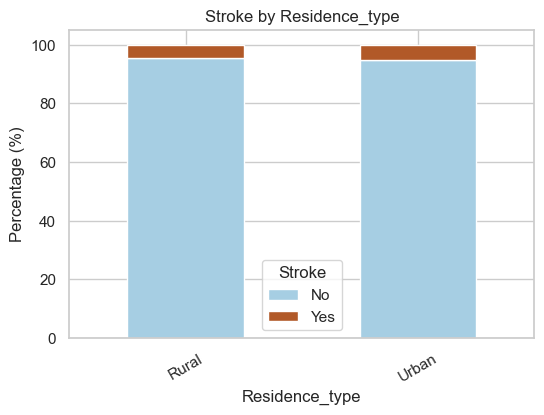

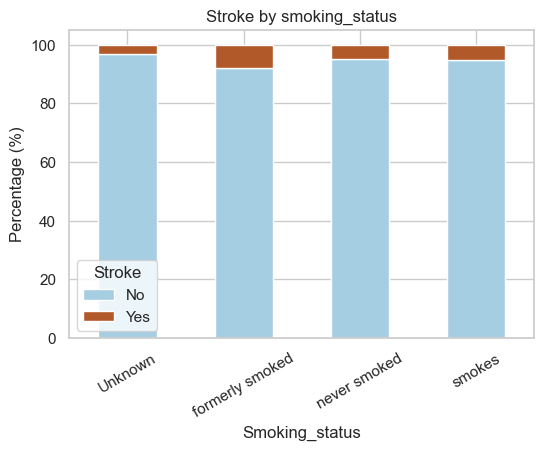

In [19]:
cat_features = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                'work_type', 'Residence_type', 'smoking_status']

for col in cat_features:
    cross_tab = pd.crosstab(df[col], df['stroke'], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Paired')
    plt.title(f'Stroke by {col}')
    plt.ylabel('Percentage (%)')
    plt.xlabel(col.capitalize())
    plt.xticks(rotation=30)
    plt.legend(title='Stroke', labels=['No', 'Yes'])
    plt.show()


## INSIGHTS
Gender doesnt seem to have any direct effect with stroke

people with hpyertension have more stroke as it appears

people with heartdisesas also have more strokes

strangely marriage seems to have a relation with strokes as people who gets married have more stroke then single people 
this need more anlaysis 

work type : people who work in government ,private or slef_employed have more chance of stroke than other work types

people living in urban have higher chance of haveing a stroke than people who live in rural but not significanlty hihger 

frequent smoker have high chance of ahving a stroke 

## Corrlation analysis 

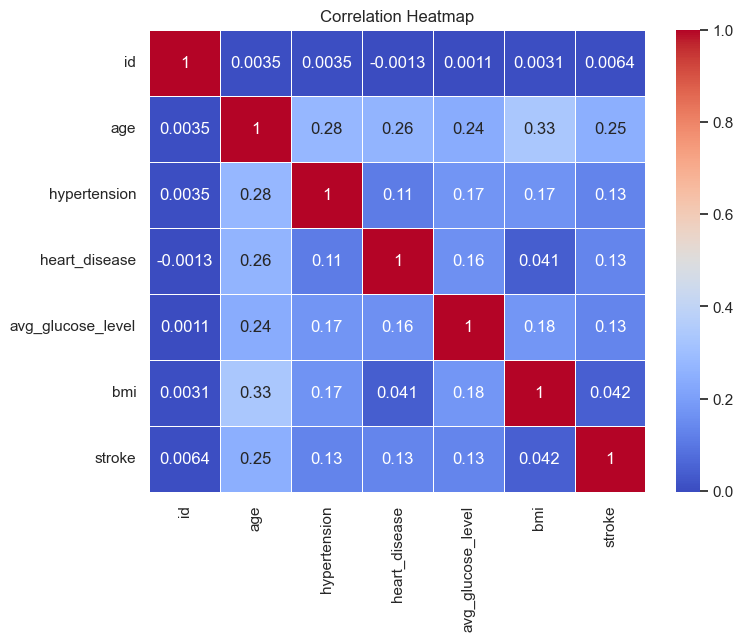

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
id                   0.006388
Name: stroke, dtype: float64


In [20]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Check correlation with target
print(corr['stroke'].sort_values(ascending=False))


In [21]:
# Select numerical features including the target
num_features = ['age', 'bmi', 'avg_glucose_level', 'hypertension', 'heart_disease', 'stroke']

# Compute correlation matrix
corr_matrix = df[num_features].corr()

# Show correlation matrix
print(corr_matrix)


                        age       bmi  avg_glucose_level  hypertension  \
age                1.000000  0.333398           0.238171      0.276398   
bmi                0.333398  1.000000           0.175502      0.167811   
avg_glucose_level  0.238171  0.175502           1.000000      0.174474   
hypertension       0.276398  0.167811           0.174474      1.000000   
heart_disease      0.263796  0.041357           0.161857      0.108306   
stroke             0.245257  0.042374           0.131945      0.127904   

                   heart_disease    stroke  
age                     0.263796  0.245257  
bmi                     0.041357  0.042374  
avg_glucose_level       0.161857  0.131945  
hypertension            0.108306  0.127904  
heart_disease           1.000000  0.134914  
stroke                  0.134914  1.000000  


In [22]:
# Correlation of each numeric feature with the target
corr_with_target = corr_matrix['stroke'].sort_values(ascending=False)
print("Correlation with Stroke:\n", corr_with_target)


Correlation with Stroke:
 stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
Name: stroke, dtype: float64


## Outlier Analysis

In [23]:
num_features = ['age', 'bmi', 'avg_glucose_level']
Q1 = df[num_features].quantile(0.25)
Q3 = df[num_features].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[num_features] < (Q1 - 1.5 * IQR)) | 
            (df[num_features] > (Q3 + 1.5 * IQR)))

print("Number of outliers per column:")
print(outliers.sum())

Number of outliers per column:
age                    0
bmi                  110
avg_glucose_level    627
dtype: int64


## Data Preprocessing

In [24]:
# Numerical features
num_features = ['age', 'bmi', 'avg_glucose_level']

# Compute Q1, Q3, and IQR
Q1 = df[num_features].quantile(0.25)
Q3 = df[num_features].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers = ((df[num_features] < (Q1 - 1.5 * IQR)) | 
            (df[num_features] > (Q3 + 1.5 * IQR)))

# Remove rows with any outliers
df = df[~outliers.any(axis=1)].copy()

# Optional: Log-transform avg_glucose_level on the cleaned dataframe
df['avg_glucose_level_log'] = np.log1p(df['avg_glucose_level'])

# Check number of outliers remaining
outliers_after = ((df[num_features] < (Q1 - 1.5 * IQR)) | 
                  (df[num_features] > (Q3 + 1.5 * IQR)))

print("Number of outliers per column after removing:")
print(outliers_after.sum())

Number of outliers per column after removing:
age                  0
bmi                  0
avg_glucose_level    0
dtype: int64


In [25]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_log
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,4.672081
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,4.263947
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,4.557974
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1,4.345752
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,4.087152


In [26]:
print(df.isna().sum())

id                         0
gender                     0
age                        0
hypertension               0
heart_disease              0
ever_married               0
work_type                  0
Residence_type             0
avg_glucose_level          0
bmi                      140
smoking_status             0
stroke                     0
avg_glucose_level_log      0
dtype: int64


In [27]:
df['age'] = df['age'].mask(df['age'] < 1, np.nan)

# 2️⃣ Replace missing/invalid ages with median
median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age)

# 3️⃣ Optional: check results
print("Number of missing or invalid ages:", df['age'].isna().sum())
print("Min and max age:", df['age'].min(), df['age'].max())

Number of missing or invalid ages: 0
Min and max age: 1.0 82.0


In [28]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# List of categorical columns
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# -----------------------------
# 1️⃣ Fill missing categorical values
# -----------------------------
for col in categorical_cols:
    if col in df.columns:  # Ensure column exists
        if df[col].isna().all():  # If all values are NaN
            df[col] = 'Unknown'
        else:
            mode_val = df[col].mode()
            if len(mode_val) > 0:
                df[col] = df[col].fillna(mode_val[0])
            else:
                df[col] = df[col].fillna('Unknown')

# -----------------------------
# 2️⃣ Encode binary categorical columns
# -----------------------------
binary_cols = ['gender', 'ever_married', 'Residence_type']
le = LabelEncoder()
for col in binary_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

# -----------------------------
# 3️⃣ One-hot encode multi-class categorical columns
# -----------------------------
multi_class_cols = ['work_type', 'smoking_status']
# Keep only existing columns
multi_class_cols = [col for col in multi_class_cols if col in df.columns]
if multi_class_cols:
    df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

# -----------------------------
# 4️⃣ Fill any remaining missing numeric values (e.g., BMI)
# -----------------------------
if 'bmi' in df.columns:
    df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# -----------------------------
# 5️⃣ Verify preprocessing
# -----------------------------
print("Missing values after preprocessing:")
print(df.isna().sum())

print("\nData types after preprocessing:")
print(df.dtypes)

print("\nFirst 5 rows of processed dataset:")
print(df.head())


Missing values after preprocessing:
id                                0
gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
stroke                            0
avg_glucose_level_log             0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

Data types after preprocessing:
id                                  int64
gender                              int32
age                               float64
hypertension                        int64
heart_disease                       int64
ever_married                        int32
Residence_type    

In [29]:
df.head(50)

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,avg_glucose_level_log,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,4.672081,False,True,False,False,False,True,False
6,53882,1,74.0,1,1,1,0,70.09,27.4,1,4.263947,False,True,False,False,False,True,False
7,10434,0,69.0,0,0,0,1,94.39,22.8,1,4.557974,False,True,False,False,False,True,False
8,27419,0,59.0,0,0,1,0,76.15,27.4,1,4.345752,False,True,False,False,False,False,False
9,60491,0,78.0,0,0,1,1,58.57,24.2,1,4.087152,False,True,False,False,False,False,False
10,12109,0,81.0,1,0,1,0,80.43,29.7,1,4.399744,False,True,False,False,False,True,False
11,12095,0,61.0,0,1,1,0,120.46,36.8,1,4.799585,False,False,False,False,False,False,True
12,12175,0,54.0,0,0,1,1,104.51,27.3,1,4.658806,False,True,False,False,False,False,True
15,58202,0,50.0,1,0,1,0,167.41,30.9,1,5.126401,False,False,True,False,False,True,False
18,27458,0,60.0,0,0,0,1,89.22,37.8,1,4.502251,False,True,False,False,False,True,False


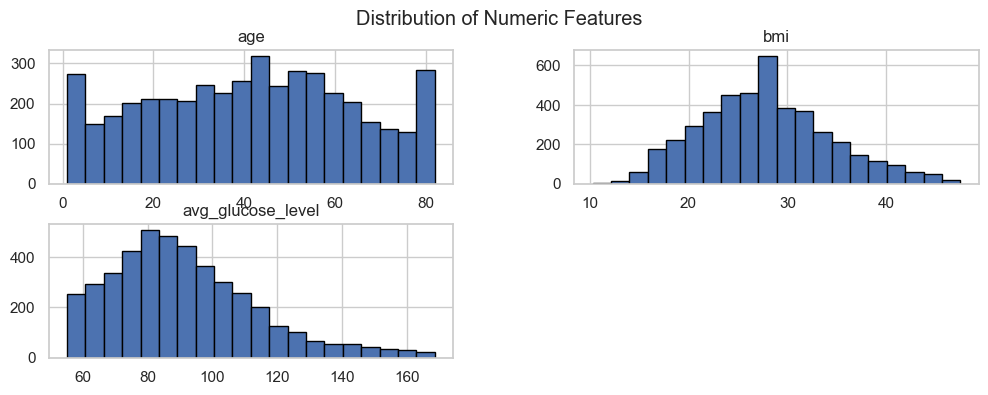

In [30]:
numeric_cols = ['age', 'bmi', 'avg_glucose_level']

df[numeric_cols].hist(figsize=(12, 4), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numeric Features")
plt.show()


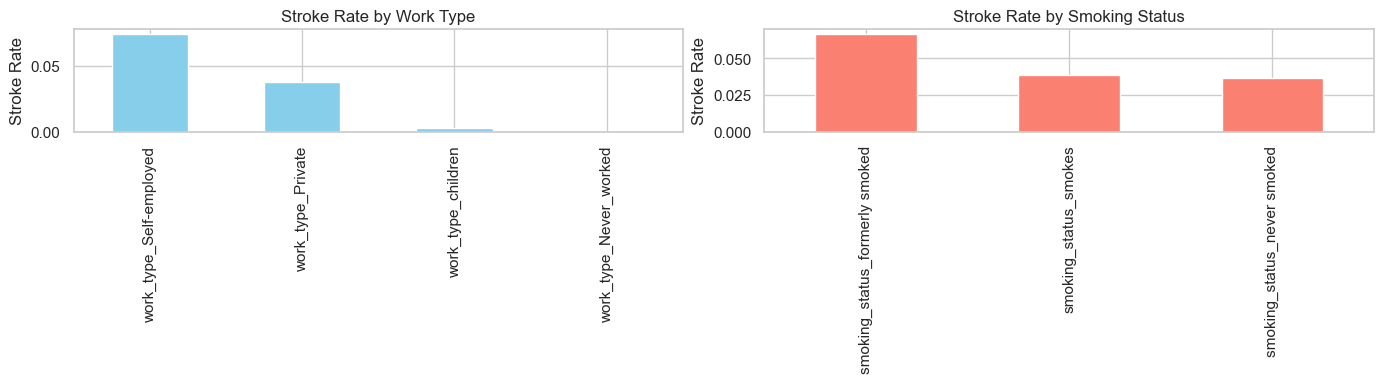

In [31]:


# One-hot encoded columns
work_cols = ['work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children']
smoking_cols = ['smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']

plt.figure(figsize=(14,4))

# Work type
plt.subplot(1,2,1)
stroke_rate_work = df[work_cols].T.dot(df['stroke']) / df[work_cols].sum()
stroke_rate_work.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.ylabel('Stroke Rate')
plt.title('Stroke Rate by Work Type')

# Smoking status
plt.subplot(1,2,2)
stroke_rate_smoking = df[smoking_cols].T.dot(df['stroke']) / df[smoking_cols].sum()
stroke_rate_smoking.sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.ylabel('Stroke Rate')
plt.title('Stroke Rate by Smoking Status')

plt.tight_layout()
plt.show()


In [32]:
# Display datatypes with nicer formatting
data_types = pd.DataFrame(df.dtypes, columns=['Data Type'])
print(data_types)


                               Data Type
id                                 int64
gender                             int32
age                              float64
hypertension                       int64
heart_disease                      int64
ever_married                       int32
Residence_type                     int32
avg_glucose_level                float64
bmi                              float64
stroke                             int64
avg_glucose_level_log            float64
work_type_Never_worked              bool
work_type_Private                   bool
work_type_Self-employed             bool
work_type_children                  bool
smoking_status_formerly smoked      bool
smoking_status_never smoked         bool
smoking_status_smokes               bool


In [33]:
df = df.drop('id', axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,avg_glucose_level_log,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,1,80.0,0,1,1,0,105.92,32.5,1,4.672081,False,True,False,False,False,True,False
6,1,74.0,1,1,1,0,70.09,27.4,1,4.263947,False,True,False,False,False,True,False
7,0,69.0,0,0,0,1,94.39,22.8,1,4.557974,False,True,False,False,False,True,False
8,0,59.0,0,0,1,0,76.15,27.4,1,4.345752,False,True,False,False,False,False,False
9,0,78.0,0,0,1,1,58.57,24.2,1,4.087152,False,True,False,False,False,False,False


In [34]:
df = df.drop('avg_glucose_level', axis=1)


In [35]:
data_types = pd.DataFrame(df.dtypes, columns=['Data Type'])
print(data_types)

                               Data Type
gender                             int32
age                              float64
hypertension                       int64
heart_disease                      int64
ever_married                       int32
Residence_type                     int32
bmi                              float64
stroke                             int64
avg_glucose_level_log            float64
work_type_Never_worked              bool
work_type_Private                   bool
work_type_Self-employed             bool
work_type_children                  bool
smoking_status_formerly smoked      bool
smoking_status_never smoked         bool
smoking_status_smokes               bool
